In [2]:
install.packages("fastR2")

also installing the dependencies ‘tweenr’, ‘polyclip’, ‘ggforce’, ‘labelled’, ‘png’, ‘raster’, ‘viridis’, ‘leaflet.providers’, ‘ggformula’, ‘mosaicData’, ‘mosaicCore’, ‘ggstance’, ‘ggridges’, ‘ggrepel’, ‘latticeExtra’, ‘ggdendro’, ‘gridExtra’, ‘leaflet’, ‘mosaic’, ‘maxLik’, ‘miscTools’





The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//Rtmpn77reG/downloaded_packages


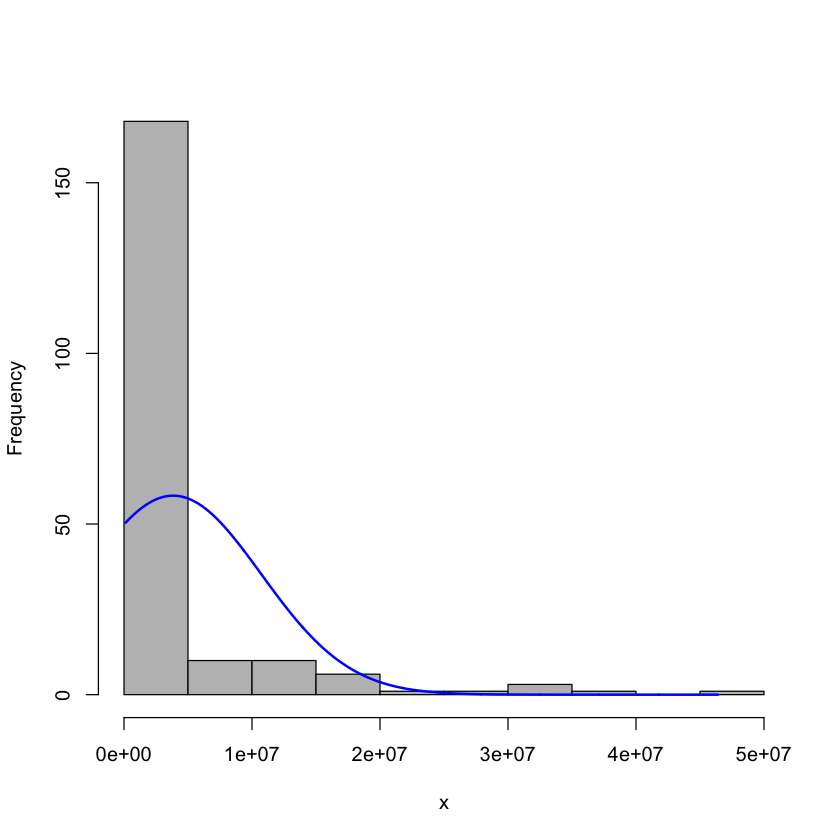

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,4,0.03178299,0.9980452
,196,NA,NA



Error: state
          Df Sum Sq Mean Sq F value Pr(>F)
year       1    2.6   2.571   0.272  0.605
Residuals 39  368.6   9.452               

Error: Within
           Df Sum Sq Mean Sq F value  Pr(>F)   
year        4  0.677 0.16913   4.007 0.00402 **
Residuals 156  6.584 0.04221                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

             Df Sum Sq Mean Sq F value Pr(>F)
year          4    0.4   0.112   0.058  0.994
Residuals   196  378.0   1.929               

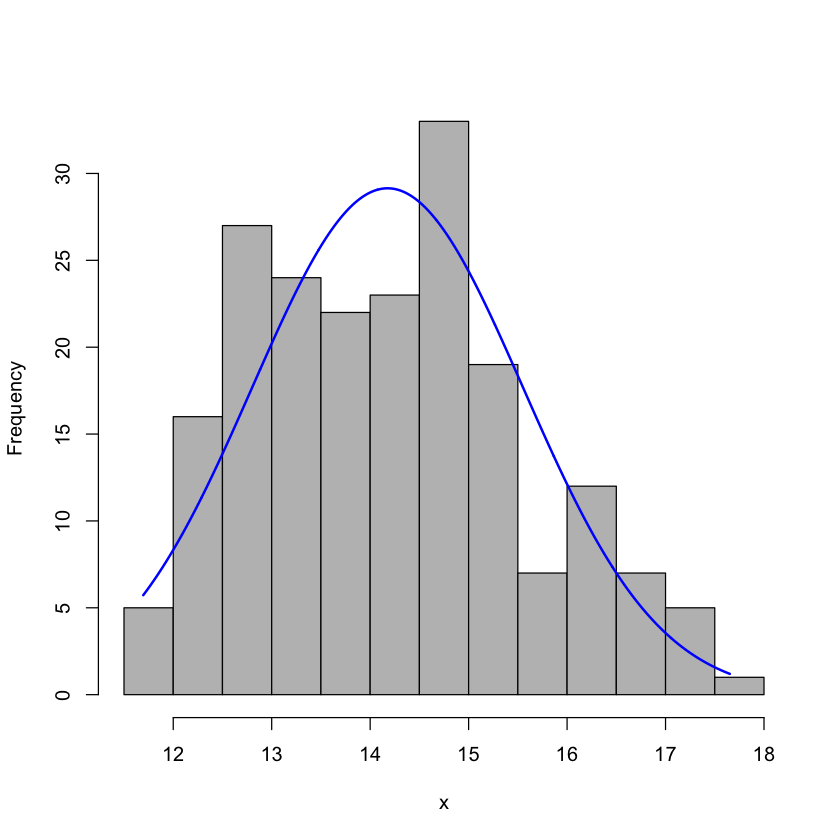

In [6]:
library("rcompanion")
library("fastR2")
library("car")
library("dplyr")

#Load in Data
honey.df <- read.csv('../data/honey.csv')

#Data Wrangling
honey.df$year <- as.character(honey.df$year)
honey.df$year <- as.factor(honey.df$year)

#Postively skewed
plotNormalHistogram(honey.df$totalprod)

#Log transformation looks great
plotNormalHistogram(log(honey.df$totalprod))

honey.df$totalprodLOG <- log(honey.df$totalprod)

#Check for Assumptions

#Passed assumption of homogenity of variance for normally distributed variable
leveneTest(totalprodLOG ~ year, data=honey.df)

#Run the Analysis
RManova <- aov(totalprodLOG~year+Error(state), honey.df)
summary(RManova)

RManova <- aov(log(totalprod)~year, honey.df)
summary(RManova)